# 3.1 Field and Record Data

*Estimated time to complete this notebook: 20 minutes*

## 3.1.1 Separated Value Files

Let's go back to the sunspots example [from the previous module](../module02_intermediate_python/02_04_getting_data_from_the_internet.ipynb).
We had downloaded some semicolon separated data and decided it was better to use a library than to write our own parser.

In [1]:
import requests

spots = requests.get("http://www.sidc.be/silso/INFO/snmtotcsv.php", timeout=60)
spots.text.split("\n")[0]

'1749;01;1749.042;  96.7; -1.0;   -1;1'

We want to work programmatically with *Separated Value* files.

These are files which have:

* Each *record* on a line
* Each record has multiple *fields*
* Fields are separated by some *separator*

Typical separators are the `space`, `tab`, `comma`, and `semicolon` separated values files, e.g.:

* Space separated value (e.g. `field1 "field two" field3` )
* Comma separated value (e.g. `field1, another field, "wow, another field"`)

Comma-separated-value is abbreviated CSV, and tab separated value TSV.

CSV is also used to refer to all the different sub-kinds of separated value files, i.e. some people use CSV to refer to tab, space and semicolon separated files.

CSV is not a particularly great data format, because it forces your data model to be a list of lists.
Richer file formats describe "serialisations" for dictionaries and for deeper-than-two nested list structures as well.

Nevertheless, CSV files are very popular because you can always export *spreadsheets* as CSV files, (each cell is a field, each row is a record)

## 3.1.2 CSV variants

Some CSV formats define a comment character, so that rows beginning with, e.g., a #, are not treated as data, but give a human comment.

Some CSV formats define a three-deep list structure, where a double-newline separates records into blocks.

Some CSV formats assume that the first line defines the names of the fields, e.g.:

```
name, age
James, 39
Will, 2
```

## 3.1.3 Python CSV readers

The Python standard library has a `csv` module.
However, it's less powerful than the CSV capabilities in other libraries such as [`numpy`](https://numpy.org/).
Here we will use [`pandas`](https://pandas.pydata.org/) which is built on top of `numpy`.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("http://www.sidc.be/silso/INFO/snmtotcsv.php", sep=";", header=None)
df.head()

,0,1,2,3,4,5,6
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1


Pandas `read_csv` is a powerful CSV reader tool.
A path to the data is given, this can be something on a local machine, or in this case the path is a url.


We used the `sep` optional argument to specify the delimeter.
The optional argument `header` specifies if the data contains headers, and if so; the row numbers to use as column names.


The data is loaded into a DataFrame.
The `head` method shows us the first 5 entries in the dataframe.
The `tail` method shows us the last 5 entries.

In [4]:
df.tail()

,0,1,2,3,4,5,6
3290,2023,3,2023.204,122.6,17.1,947,0
3291,2023,4,2023.286,96.4,17.1,1003,0
3292,2023,5,2023.371,137.9,19.3,1054,0
3293,2023,6,2023.453,163.4,20.1,1072,0
3294,2023,7,2023.538,159.1,17.3,1039,0


In [5]:
df[3][0]

96.7

We can now plot the "Sunspot cycle":

<Axes: xlabel='2'>

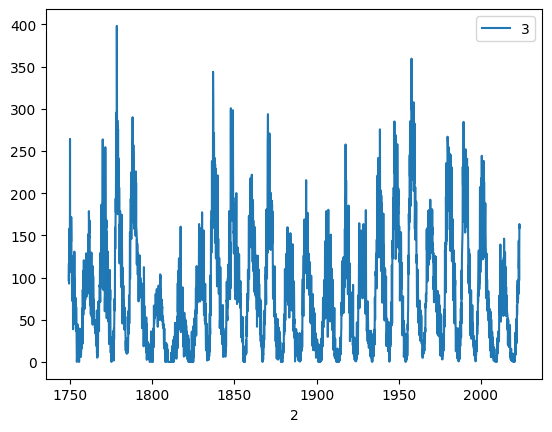

In [6]:
df.plot(x=2, y=3)

The plot command accepted an series of 'X' values and an series of 'Y' values, identified by their column number in this case, as the dataframe does not have (useful) column headers yet.

## 3.1.4 Naming Columns

As it happens, the columns definitions can be found on the source website (http://www.sidc.be/silso/infosnmtot)

> CSV
> 
> Filename: SN_m_tot_V2.0.csv
> Format: Comma Separated values (adapted for import in spreadsheets)
> The separator is the semicolon ';'.
> 
> Contents:
> - Column 1-2: Gregorian calendar date
>   - Year
>   - Month
> - Column 3: Date in fraction of year.
> - Column 4: Monthly mean total sunspot number.
> - Column 5: Monthly mean standard deviation of the input sunspot numbers.
> - Column 6: Number of observations used to compute the monthly mean total sunspot number.
> - Column 7: Definitive/provisional marker. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.

We can actually specify this to the formatter:

In [7]:
df_w_names = pd.read_csv(
    "http://www.sidc.be/silso/INFO/snmtotcsv.php",
    sep=";",
    header=None,
    names=["year", "month", "date", "mean", "deviation", "observations", "definitive"],
)
df_w_names.head()

,year,month,date,mean,deviation,observations,definitive
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1


<Axes: xlabel='date'>

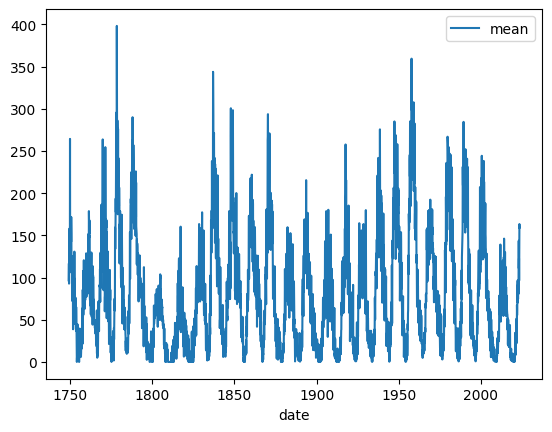

In [8]:
df_w_names.plot(x="date", y="mean")

Note: The plot method used for the `DataFrame` is just a wrapper around the `matplotlib` function `plt.plot()`:

## 3.1.5 Typed Fields

It's also often useful to check, and if necessary specify, the datatype of each field.

In [9]:
df_w_names.dtypes  # Check the data types of all columns in the DataFrame

year              int64
month             int64
date            float64
mean            float64
deviation       float64
observations      int64
definitive        int64
dtype: object

In this case the data types seem sensible, however if we wanted to convert the year into a floating point number instead, we could via:

In [10]:
df_w_names["year"] = df_w_names["year"].astype("float64")
df_w_names.dtypes

year            float64
month             int64
date            float64
mean            float64
deviation       float64
observations      int64
definitive        int64
dtype: object

In [11]:
df_w_names.head()

,year,month,date,mean,deviation,observations,definitive
0,1749.0,1,1749.042,96.7,-1.0,-1,1
1,1749.0,2,1749.123,104.3,-1.0,-1,1
2,1749.0,3,1749.204,116.7,-1.0,-1,1
3,1749.0,4,1749.288,92.8,-1.0,-1,1
4,1749.0,5,1749.371,141.7,-1.0,-1,1


## 3.1.6 Filtering data

Sometimes it is necessary to filter data, for example to only see the sunspots for the year 2018 you would use:

In [12]:
df_twenty_eighteen = df_w_names[(df_w_names["year"] == 2018)]
df_twenty_eighteen.head(20)

,year,month,date,mean,deviation,observations,definitive
3228,2018.0,1,2018.042,6.8,1.5,701,1
3229,2018.0,2,2018.122,10.7,1.1,917,1
3230,2018.0,3,2018.204,2.5,0.4,1081,1
3231,2018.0,4,2018.286,8.9,1.3,996,1
3232,2018.0,5,2018.371,13.1,1.6,1234,1
3233,2018.0,6,2018.453,15.6,1.6,1070,1
3234,2018.0,7,2018.538,1.6,0.6,1438,1
3235,2018.0,8,2018.623,8.7,1.0,1297,1
3236,2018.0,9,2018.705,3.3,0.6,1223,1
3237,2018.0,10,2018.790,4.9,1.2,1097,1


Even though we used 
```bash
df_twenty_eighteen.head(20)
```
to show us the first 20 results from the dataframe, only 12 are shown as there are only 12 months in a year

If we wanted all data from 1997 to 1999 we could via:

In [13]:
df_nineties = df_w_names[(df_w_names["year"] >= 1997) & (df_w_names["year"] < 2000)]

In [14]:
df_nineties.head()

,year,month,date,mean,deviation,observations,definitive
2976,1997.0,1,1997.042,7.4,3.2,497,1
2977,1997.0,2,1997.123,11.0,2.9,545,1
2978,1997.0,3,1997.204,12.1,2.4,627,1
2979,1997.0,4,1997.288,23.0,3.3,663,1
2980,1997.0,5,1997.371,25.4,2.8,716,1


In [15]:
df_nineties.tail()

,year,month,date,mean,deviation,observations,definitive
3007,1999.0,8,1999.623,142.3,12.9,649,1
3008,1999.0,9,1999.707,106.3,6.5,624,1
3009,1999.0,10,1999.790,168.7,10.4,531,1
3010,1999.0,11,1999.874,188.3,12.3,406,1
3011,1999.0,12,1999.958,116.8,9.3,404,1
